# Assignment 3: Deep Convolutional Neural Networks and Transformers

# Section 1: Implementation, Analysis, Performance Evaluation and Comparison of Deep Convolutional Neural Networks for Image Classification (70 points)

**Objective:** The objective of this section is to implement a deep convolutional neural network (CNN) for the identification of flower types. The provided dataset consists of five classes of flowers, namely chamomile, tulip, rose, sunflower, and dandelion. 

**Tasks:**
To complete this assignment, please submit a single notebook that includes the implementation and outputs of the following eight steps.
Provide answers for each sub-question by thorough analysis and extensive experimental investigation using the provided dataset. In other words, your answers should be backed by experimental analysis of your models and the dataset. Please ensure that the notebook retain the outputs. Failure to do so will result in zero marks for the corresponding steps in which no output is displayed.

In [48]:
import os
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt
import splitfolders
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input


In [49]:
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

**1. Prepare and Preprocess the data. (10 points)**

* What is the total number of images in the dataset, and how are they distributed across the five flower types?

* Do we need to implement techniques to balance the distribution of images across various flower types, such as oversampling or undersampling?

* What are the dimensions (height and width) of the images in the dataset, and is there any variation among different flower types?

* What preprocessing techniques should be applied, such as resizing, normalization or standardization and why?

* How would you split the dataset into training, validation and testing sets, and in what ratios?


Total number of images: 4317
Image distribution across classes: {'daisy': 764, 'rose': 784, 'tulip': 984, 'dandelion': 1052, 'sunflower': 733}


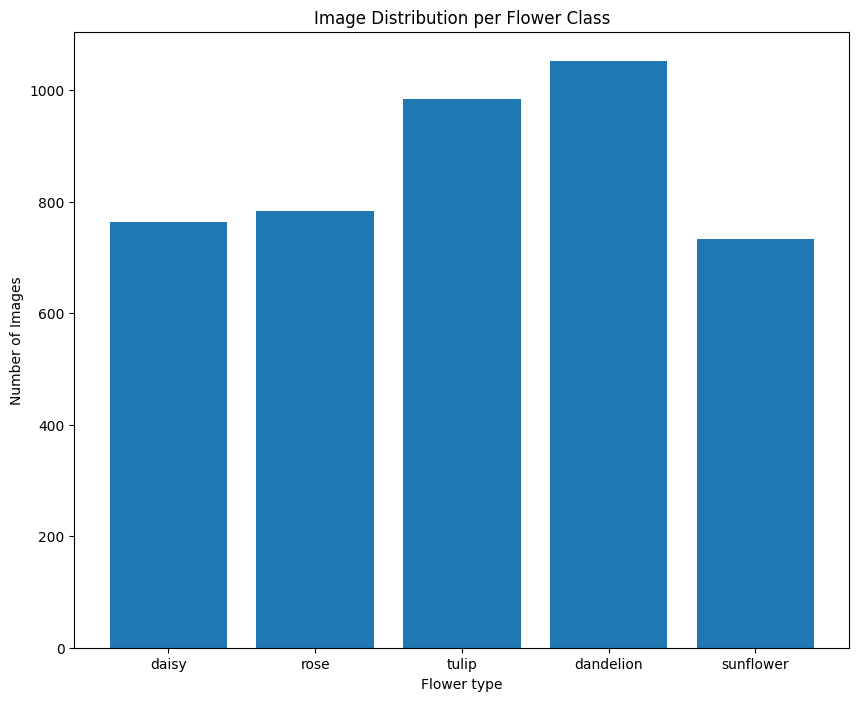

In [50]:
#Step 1 implementation
#Hint: Take the help of split-folder python library

#1.1 the total number of images in the dataset and their distribution
data_dir = "/Users/pushuying/Desktop/T2-MDS/2025_T1S1/Concept AI/assignment/assignment3/Assignment3/flowers"

count = {}

for flower in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, flower)
    if os.path.isdir(folder_path): 
        count[flower] = len(os.listdir(folder_path))

total_number = sum(count.values())
print("Total number of images:", total_number)
print("Image distribution across classes:", count)


import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.bar(count.keys(), count.values())
plt.xlabel('Flower type')
plt.ylabel('Number of Images')
plt.title('Image Distribution per Flower Class')
plt.show()

#1.1 Answer: 
#This dataset contains a total of 4317 images, distributed unevenly across five flower classes. 
# Specifically, daisy has 764 images, rose has 784, tulip has 984, dandelion has 1052, and sunflower has 733 images.

In [40]:
#1.2 oversampling or under sampling?
#1.2 Answer: 
#If I use undersampling, it will reduce the dataset size and potentially cause the model to lose useful information, which may negatively affect performance.
#On the other hand, oversampling by duplicating the same images can lead to overfitting, as the model may memorize repeated samples.
#Therefore, to address class imbalance, I will apply data augmentation techniques to generate more diverse images for underrepresented classes, which helps balance the dataset without sacrificing generalization.
#Additionally, it can be observed that the class distribution is not severely imbalanced (the difference between the largest and smallest classes is only 319 images), so proceeding with training after data augmentation is a reasonable approach.


#Note: The data augmentation code is provided below.

In [51]:
#1.3 Dimensions of the images and check the variation among different flower types
import matplotlib.pyplot as plt
img = plt.imread("/Users/pushuying/Desktop/T2-MDS/2025_T1S1/Concept AI/assignment/assignment3/Assignment3/flowers_split/test/daisy/5673551_01d1ea993e_n.jpg")
print(img.shape) 

#checking
for flower_type in os.listdir(data_dir):
    flower_path = os.path.join(data_dir, flower_type)
    if os.path.isdir(flower_path):
        sample_images = random.sample(os.listdir(flower_path), 3)
        print(f"\nFlower type: {flower_type}")
        for img_name in sample_images:
            img_path = os.path.join(flower_path, img_name)
            try:
                img = plt.imread(img_path)
                print(f"{img_name}: shape = {img.shape}")
            except:
                print(f"Failed to load image: {img_name}")

#1.3 Answer:I randomly selected 3 images from each flower type and printed their dimensions using .shape. 
#The results show that the image sizes are not consistent, both within each flower type and across different flower types. 
#Therefore, resizing is necessary to standardize the input dimensions before feeding the images into the CNN model.

(212, 320, 3)

Flower type: daisy
100080576_f52e8ee070_n.jpg: shape = (263, 320, 3)
6480809573_76a0074b69_n.jpg: shape = (256, 320, 3)
14471433500_cdaa22e3ea_m.jpg: shape = (240, 240, 3)

Flower type: rose
5002461124_dc5988bbc9_n.jpg: shape = (159, 240, 3)
14573732424_1bb91e2e42_n.jpg: shape = (235, 320, 3)
4413509121_a62879598a.jpg: shape = (333, 500, 3)

Flower type: tulip
4681062529_36186617d9.jpg: shape = (334, 500, 3)
8689672277_b289909f97_n.jpg: shape = (240, 320, 3)
14171673854_1208c19be3_m.jpg: shape = (240, 240, 3)

Flower type: dandelion
34351602790_37234e2dae_n.jpg: shape = (120, 240, 3)
4893356345_24d67eff9f_m.jpg: shape = (240, 188, 3)
4575406391_7a62c5f90f_n.jpg: shape = (240, 320, 3)

Flower type: sunflower
9564240106_0577e919da_n.jpg: shape = (240, 320, 3)
7603036176_9e8967cd21.jpg: shape = (333, 500, 3)
40410686_272bc66faf_m.jpg: shape = (240, 180, 3)


In [42]:
#1.4 What preprocessing techniques should be applied, such as resizing, normalization or standardization and why?
#1.4 Answer: I need to resize all images to a fixed size to meet the input requirements of the model.
#Otherwise, the model cannot be trained properly and will raise an error due to inconsistent input shapes.
#In addition, I need to normalize the pixel values to the range of [0, 1], which helps improve training efficiency and enhances the model’s stability and convergence.

#Note: The code is provided below.

In [52]:
#1.5 How would you split the dataset into training, validation and testing sets, and in what ratios?
splitfolders.ratio(data_dir, output="flowers_split",seed=42, ratio=(0.7, 0.15, 0.15))
#1.5 Answer: I used the 'splitfolders' library to divide the dataset into training, validation, and testing sets with a ratio of 70:15:15.

Copying files: 4317 files [00:02, 1805.61 files/s]


In [53]:
#Data augmentation:
train_dir = '/Users/pushuying/Desktop/T2-MDS/2025_T1S1/Concept AI/assignment/assignment3/Assignment3/flowers_split/train'
val_dir = '/Users/pushuying/Desktop/T2-MDS/2025_T1S1/Concept AI/assignment/assignment3/Assignment3/flowers_split/val'
test_dir = '/Users/pushuying/Desktop/T2-MDS/2025_T1S1/Concept AI/assignment/assignment3/Assignment3/flowers_split/test'

train_datagen = ImageDataGenerator(
    rescale= 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical' 
)

val_datagen = ImageDataGenerator(rescale = 1./255)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 3019 images belonging to 5 classes.
Found 644 images belonging to 5 classes.
Found 654 images belonging to 5 classes.


**2. Design a CNN architecture with its input is image size of $224 \times 224 \times 3$ and the output is the class. Draw the diagram of your CNN architecture (An example diagram is given blow) and save it as "studentCNN.png".(5 points)**
  
* Design and Explain why you think this architecture is suitable for this image classification task.
  
<img src='CNN.png' alt='given CNN'>

> **Step 2** Design and draw CNN
> 
> **hint** Consider the computational cost of training your CNN
>
> <img src='cnn_shuying.png' alt='student CNN'>

The goal of this image classification task is to recognize five types of flower images. The dataset contains a total of 4,317 images, making it a small-to-medium-sized dataset. Therefore, it is not suitable to use a very deep or parameter-heavy neural network.

When designing the model, I considered the following aspects:
1. Hardware limitations: This project is being trained on a Mac with 16GB of memory, which cannot support large-scale models. Therefore, it is important to control both the number of parameters and the computational cost.
2. Risk of overfitting: On small datasets, using a complex network architecture may lead to overfitting. Thus, I designed a relatively shallow and compact CNN.
3. Effective feature extraction: Although the model is simplified, I still want it to effectively extract features such as edges, textures, and shapes. Therefore, I adopted and adjusted the convolutional structure design of VGG16.

Specifically, I made the following simplifications and optimizations based on the design philosophy of VGG16:
1. A MaxPooling layer is added after every two convolutional layers to reduce spatial dimensions, decrease the number of parameters, and enhance the model’s translation invariance.
2. All convolution kernels are set to a size of 3×3 with a stride of 1 to maintain local detail extraction capability.
3. The number of channels increases gradually: 32 → 64 → 128.
4. A Flatten layer is followed by a fully connected layer with 128 neurons, and the final output layer uses Softmax for classification.
5. The total number of parameters is 10,380,197, which is approximately 40MB — acceptable under my current hardware constraints.

This network strikes a good balance between feature extraction and computational efficiency, making it well-suited for this flower classification task.

**3. Implement your CNN (5 points)**

In [54]:
#Step 3 implementation


cnn = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(32, (3,3), activation='relu'),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128,activation='relu'),
    Dense(5,activation='softmax')

])

In [55]:
cnn.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 220, 220, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 110, 110, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 108, 108, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 106, 106, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 53, 53, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 51, 51, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 80000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │    10,240,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,380,197 (39.60 MB)

 Trainable params: 10,380,197 (39.60 MB)

 Non-trainable params: 0 (0.00 B)

**4. Train the model. (10 Points)** 

Note: In Colab, change runtime type to T4 GPU (via Connect==>change runtime type) to ensure the running time won't be too long.

* What is your approach for selecting the appropriate hyperparameters for the model training, such as the learning rate, number of epochs, batch size, and optimizer?

* What methods do you use for monitoring the training progress and performance of the model and why?

* What metrics would you prefer to measure the performance, such as accuracy, precision, recall, F1 score, or ROC-AUC and why?

Answer:
1. 超参数的选择综合考虑了以下几个方面：
	1.	硬件资源限制：由于设备内存有限，我选择了较小的 batch size = 32，以减少内存占用，确保训练过程顺利进行。
	2.	训练时间成本：考虑到每轮训练耗时较长，我将训练轮数设置为 5，以便更快验证模型性能，避免资源浪费。
	3.	优化器与学习率选择：我使用了 Adam 优化器，并尝试了三个不同的学习率：0.001、0.0001 和 0.00001。实验结果显示，当学习率为 0.001 时，模型在验证集上的最高准确率为 0.6475，优于 0.0001（0.5932）和 0.00001（0.5093）。因此我最终选择了 0.001 作为最优学习率。

2. 我通过观察验证集上的损失值和准确率来监控训练过程，从而判断模型是否存在过拟合或欠拟合。

3. 评价指标选择：我更倾向于使用 F1 分数（F1 Score） 作为主要评估指标，因为它在 精确率（Precision） 和 召回率（Recall） 之间取得了良好平衡，特别适合应对本次任务中可能存在的类别不均衡问题。

Answer:

1. The selection of hyperparameters was based on a comprehensive consideration of several factors:
	1.	Hardware constraints: Due to limited device memory, I chose a relatively small batch size of 32 to reduce memory usage and ensure the training process runs smoothly.
	2.	Training time cost: Given the long duration of each training epoch, I set the number of epochs to 5 to quickly validate the model’s performance.
	3.	Optimizer and learning rate: I used the Adam optimizer and experimented with three learning rates: 0.001, 0.0001, and 0.00001. The experimental results showed that the learning rate of 0.001 achieved the highest validation accuracy of 0.6475, outperforming 0.0001 (0.5932) and 0.00001 (0.5093). Therefore, I selected 0.001 as the optimal learning rate.

2. I monitored the training process using the loss and accuracy on the validation set, which helped me identify signs of overfitting or underfitting.

3. Evaluation metric: I preferred using accuracy as the main evaluation metric because the class distribution in the dataset is relatively balanced, making accuracy a valid and reliable measure of overall model performance. Additionally, accuracy is one of the most intuitive and easy-to-understand metrics, which makes it especially useful for monitoring model performance during both training and validation.

In [57]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


cnn.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['acc'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = cnn.fit(
      train_generator, 
      epochs=15,
      validation_data=val_generator,
      callbacks=[early_stop],
      verbose=1)

Epoch 1/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - acc: 0.5070 - loss: 1.2093 - val_acc: 0.6025 - val_loss: 1.0139
Epoch 2/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - acc: 0.5975 - loss: 1.0320 - val_acc: 0.6040 - val_loss: 0.9809
Epoch 3/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - acc: 0.6171 - loss: 0.9677 - val_acc: 0.6506 - val_loss: 0.9249
Epoch 4/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - acc: 0.6192 - loss: 0.9499 - val_acc: 0.6382 - val_loss: 0.9063
Epoch 5/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - acc: 0.6546 - loss: 0.9117 - val_acc: 0.6382 - val_loss: 0.8830
Epoch 6/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - acc: 0.6690 - loss: 0.8478 - val_acc: 0.6599 - val_loss: 0.8707
Epoch 7/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 169s 2s/step - acc: 0.6826 - loss: 0.8659 - val_acc: 0.6444 - val_loss: 0.9309
Epoch 8/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - acc: 0.6776 - loss: 0.8377 - val_acc: 0.6879 - val_loss: 0.8043
Epoch 9/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - acc: 0.6785 - los

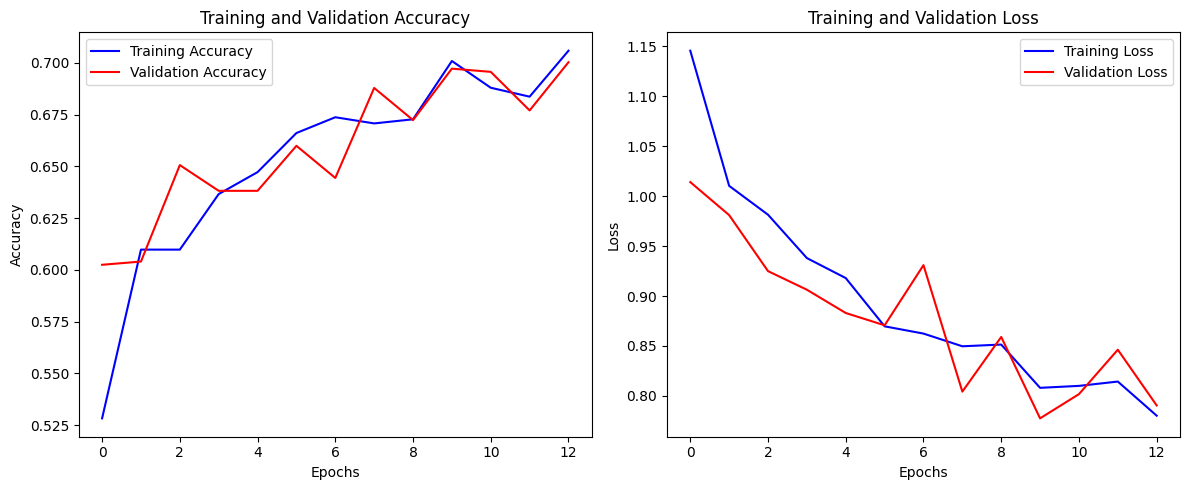

In [80]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    acc = history.history.get('acc') 
    val_acc = history.history.get('val_acc') 
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training Accuracy') 
    plt.plot(epochs, val_acc, 'r', label='Validation Accuracy') 
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

In [ ]:
#Step 3 implementation

cnn = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(32, (3,3), activation='relu'),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128,activation='relu'),
    Dense(5,activation='softmax')

])

In [ ]:
from tensorflow.keras.optimizers import Adam
cnn.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.00001), metrics=['acc'])

history2 = cnn.fit(
      train_generator, 
      epochs=5,
      validation_data=val_generator,
      verbose=1)

Epoch 1/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - acc: 0.2610 - loss: 1.5994 - val_acc: 0.3261 - val_loss: 1.5519
Epoch 2/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - acc: 0.3625 - loss: 1.5194 - val_acc: 0.3975 - val_loss: 1.3952
Epoch 3/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - acc: 0.4573 - loss: 1.3465 - val_acc: 0.4674 - val_loss: 1.2603
Epoch 4/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - acc: 0.4423 - loss: 1.2802 - val_acc: 0.4550 - val_loss: 1.2332
Epoch 5/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - acc: 0.4872 - loss: 1.2252 - val_acc: 0.5093 - val_loss: 1.1904


In [ ]:
#Step 3 implementation


cnn = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(32, (3,3), activation='relu'),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128,activation='relu'),
    Dense(5,activation='softmax')

])

In [ ]:
#Step 4 implementation
from tensorflow.keras.optimizers import Adam
cnn.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['acc'])

history1 = cnn.fit(
      train_generator, 
      epochs=5,
      validation_data=val_generator,
      verbose=1)

Epoch 1/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - acc: 0.3127 - loss: 1.5081 - val_acc: 0.4907 - val_loss: 1.2288
Epoch 2/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - acc: 0.5021 - loss: 1.1948 - val_acc: 0.5093 - val_loss: 1.1651
Epoch 3/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - acc: 0.5403 - loss: 1.1230 - val_acc: 0.5497 - val_loss: 1.1187
Epoch 4/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - acc: 0.5589 - loss: 1.0770 - val_acc: 0.5932 - val_loss: 1.0200
Epoch 5/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - acc: 0.6119 - loss: 1.0089 - val_acc: 0.5901 - val_loss: 0.9615


In [58]:
val_acc_history = max(history.history['val_acc'])
val_acc_history2 = max(history2.history['val_acc'])
val_acc_history1 = max(history1.history['val_acc'])

print(f"val_acc_history:{val_acc_history:.4f}")
print(f"val_acc_history2:{val_acc_history2:.4f}")
print(f"val_acc_history1:{val_acc_history1:.4f}")

val_acc_history:0.7003
val_acc_history2:0.5093
val_acc_history1:0.5932


**5. Report the results. (10 points)**

* What is the final accuracy of the model on the validation set, and how does it compare to the training accuracy?

* What is the confusion matrix for the model on the validation set, and which flower types are the most difficult to classify?

* How does the model perform on individual flower types, and are there any particular images that the model struggles to classify?

* What is the rough model complexity?

* Is the model's large size contributing to any challenges or constraints in its performance on the given dataset.


Answer:
1. 模型在验证集上的最终准确率为 0.6972，略低于训练集的准确率（0.7016），两者差异不大，说明模型没有明显的过拟合现象，具备一定的泛化能力。
2.	从混淆矩阵来看：
	* Daisy 正确分类 72 次，错误分类 42 次；
	* Dandelion 正确分类 112 次，错误分类 45 次，是正确分类数量最多的类别；
	* Rose 正确分类 66 次，错误分类 51 次，是错误分类最多的类别，准确率最低（66/117）；
	* Sunflower 正确分类 97 次，错误分类 12 次，是准确率最高的类别（97/109）；
	* Tulip 正确分类 102 次，错误分类 45 次。
    * 因此，Rose（玫瑰） 是模型最难分类的花卉，不仅错误分类数量最多，F1 分数和准确率也最低。
3.	结合混淆矩阵和 classification report 的结果可知，模型在 dandelion、sunflower 和 daisy 上表现相对较好（F1 分数分别为 0.76、0.73 和 0.72）；而在 tulip 和 rose 上表现较差（F1 分数分别为 0.68 和 0.58）。这说明模型对部分花类的识别能力较弱，可能是由于花卉之间的图像特征较为相似，或者样本质量、光照等因素造成判别困难。
4.	在模型复杂度方面，模型总参数数量为 31,140,593，整体模型大小约为 118.79 MB，其中可训练参数为 10,380,197（占 39.60 MB）。模型结构中包含大量参数，尤其是最后一个全连接层（dense_10）参数高达 10,240,128，是模型复杂度的主要来源。
5.	关于模型体积对性能的影响，目前模型在训练集和验证集上的表现较为接近，没有出现明显的过拟合迹象。然而，由于本项目数据集规模相对较小，模型训练效率偏低，且在继续增加训练轮数时可能出现过拟合风险。因此，建议在保证模型性能的前提下，探索更轻量化的模型结构，以提升训练效率并提高未来部署的灵活性。

Answer：
1.	The final validation accuracy of the model is 0.6972, which is slightly lower than the training accuracy (0.7016). The small difference between the two indicates that the model does not suffer from significant overfitting and demonstrates a reasonable level of generalization.
2.	According to the confusion matrix:
	* Daisy: 72 correctly classified, 42 misclassified;
	* Dandelion: 112 correctly classified, 45 misclassified — the class with the highest number of correct predictions;
	* Rose: 66 correctly classified, 51 misclassified — the class with the highest number of misclassifications and the lowest accuracy (66/117);
	* Sunflower: 97 correctly classified, 12 misclassified — the most accurate class (97/109);
	* Tulip: 102 correctly classified, 45 misclassified.
    * Therefore, Rose is the most difficult flower type to classify, with the highest number of misclassifications and the lowest F1-score and accuracy.
3.	Based on both the confusion matrix and classification report, the model performs relatively well on dandelion, sunflower, and daisy, with F1-scores of 0.76, 0.73, and 0.72 respectively. However, it performs poorly on tulip and rose, with F1-scores of 0.68 and 0.58. This suggests that the model struggles to distinguish certain flower types, possibly due to similar visual characteristics or variations in sample quality and lighting conditions.
4.	In terms of model complexity, the model has a total of 31,140,593 parameters, occupying approximately 118.79 MB. Among them, 10,380,197 are trainable parameters (39.60 MB). A significant portion of the complexity comes from the final fully connected layer (dense_10), which alone contains 10,240,128 parameters, making it the primary contributor to the model’s size.
5.	Regarding the impact of the model size on performance, the model currently performs similarly on both the training and validation sets, showing no signs of significant overfitting. However, due to the relatively small dataset, the training process may be inefficient, and further increasing the number of epochs could lead to overfitting. Therefore, it is recommended to explore lighter-weight model architectures that maintain accuracy while improving training efficiency and deployability.

In [65]:
# Evaluate on training set
train_loss, train_accuracy = cnn.evaluate(train_generator, verbose=0)

# Evaluate on validation set
val_loss, val_accuracy = cnn.evaluate(val_generator, verbose=0)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

Training Accuracy: 0.7016
Validation Accuracy: 0.6972


21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 269ms/step


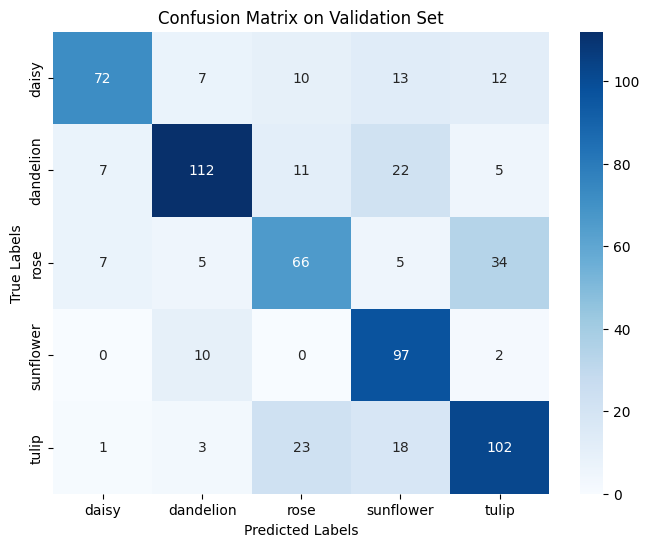

              precision    recall  f1-score   support

       daisy       0.83      0.63      0.72       114
   dandelion       0.82      0.71      0.76       157
        rose       0.60      0.56      0.58       117
   sunflower       0.63      0.89      0.73       109
       tulip       0.66      0.69      0.68       147

    accuracy                           0.70       644
   macro avg       0.71      0.70      0.69       644
weighted avg       0.71      0.70      0.70       644



In [85]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report


def evaluate_model_on_validation(model, val_generator):
    #Predict on validation set
    val_preds = model.predict(val_generator)
    val_pred_labels = np.argmax(val_preds, axis=1)
    val_true_labels = val_generator.classes

    #Confusion matrix
    cm = confusion_matrix(val_true_labels, val_pred_labels)

    #Plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=val_generator.class_indices.keys(),
                yticklabels=val_generator.class_indices.keys())
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix on Validation Set')
    plt.show()

    #Classification report
    report = classification_report(val_true_labels, val_pred_labels, target_names=val_generator.class_indices.keys())
    print(report)

#CNN results
evaluate_model_on_validation(cnn, val_generator)

              precision    recall  f1-score   support

       daisy       0.83      0.63      0.72       114
   dandelion       0.82      0.71      0.76       157
        rose       0.60      0.56      0.58       117
   sunflower       0.63      0.89      0.73       109
       tulip       0.66      0.69      0.68       147

    accuracy                           0.70       644
   macro avg       0.71      0.70      0.69       644
weighted avg       0.71      0.70      0.70       644



In [ ]:
#Check the numbers of parameter
total_params = cnn.count_params()
print(f"Total number of parameters: {total_params}")

cnn.summary()

Total number of parameters: 10380197


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 220, 220, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 110, 110, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 108, 108, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 106, 106, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 53, 53, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 51, 51, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 80000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │    10,240,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,140,593 (118.79 MB)

 Trainable params: 10,380,197 (39.60 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,760,396 (79.19 MB)

In [66]:
# Evaluate on the test set
test_loss, test_accuracy = cnn.evaluate(test_generator, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.6957


**6. Test the model by giving it a picture taken by your own phone camera. (10 points)**

* How can the accuracy of the model on the picture taken by your own phone camera be evaluated?

* What can be done if the model does not perform well on the picture taken by your own phone camera?


Answer：
1. 可以通过比较模型预测结果与图像中实际花卉类别是否一致，来评估模型在手机拍摄图片上的表现。在本次实验中，模型对 rose 和 tulip 两张手机图片均预测正确。
	* 在 rose 图片中，模型以 66% 的概率判断为 rose，同时对 tulip 的预测概率为 27%；
	* 在 tulip 图片中，模型虽然预测正确，但 tulip 的置信度仅为 40%，且对 rose 的预测概率为 30%，daisy 也达到了 19%，说明存在明显的类别混淆。
这一现象也与模型在验证集上的混淆矩阵结果基本一致，表明模型在真实图像上延续了相似的分类倾向。
2. 虽然模型在本次测试中都预测正确，但在 tulip 图片中表现出较低的置信度，并对多个类别产生混淆，说明模型可能对真实环境下图像的光照、背景、角度等变化较为敏感。若模型在其他手机拍摄的图片上表现不佳，可考虑以下改进措施：
	* 提升图像质量：拍摄时保持光线充足、图像清晰、背景简洁；
	* 收集更多真实图像进行微调：将手机拍摄的花卉图片加入训练集，对模型进行微调以增强其在真实环境中的鲁棒性；
	* 使用迁移学习：采用更适合自然图像场景的预训练模型（如 MobileNetV2、EfficientNet 等），并在花卉数据集上进一步训练，以提升模型在实际应用中的表现。

Answer:
1. The model’s performance on phone camera images can be evaluated by comparing the predicted class with the actual flower type in the image. In this experiment, the model correctly classified both the rose and tulip images:
	* For the rose image, the model predicted “rose” with 66% confidence and also gave 27% probability to “tulip”;
	* For the tulip image, the prediction was correct, but the confidence for “tulip” was only 40%, while “rose” and “daisy” received 30% and 19%, respectively — indicating noticeable confusion between similar classes.
This observation is consistent with the model’s confusion matrix on the validation set, suggesting that the model retains similar classification tendencies when applied to real-world photos.
2. Although the model made correct predictions on both images, the relatively low confidence and significant confusion in the tulip example suggest that it may be sensitive to real-world variations such as lighting, background, and camera angle. If the model performs poorly on other phone-captured images, the following strategies can be applied:
	* Improve image quality: Ensure adequate lighting, sharp focus, and simple backgrounds during photography;
	* Fine-tune the model with real-world images: Collect more flower images taken by phone cameras and use them to fine-tune the model, improving its robustness in natural environments;
	* Use transfer learning: Apply a pre-trained model better suited for real-world scenarios (e.g., MobileNetV2, EfficientNet), and fine-tune it on the flower dataset to enhance accuracy and adaptability.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted class: rose

Prediction probabilities:
daisy: 0.05
dandelion: 0.01
rose: 0.66
sunflower: 0.00
tulip: 0.27


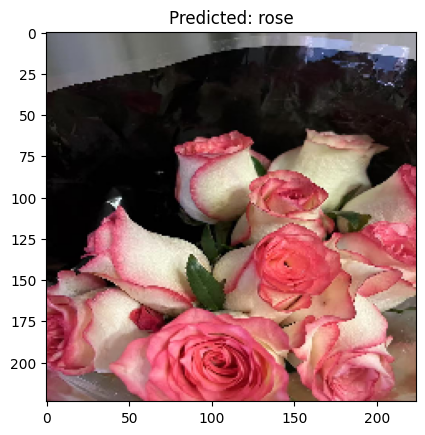

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted class: tulip

Prediction probabilities:
daisy: 0.19
dandelion: 0.07
rose: 0.30
sunflower: 0.05
tulip: 0.40


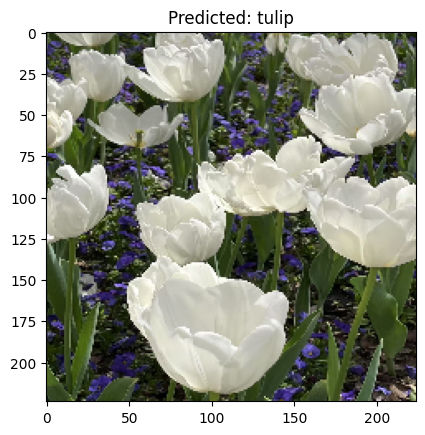

In [ ]:
#Step 6 implementation
from tensorflow.keras.preprocessing import image

#Defination basic function
def predict_phone(img_path, model, class_names):

    #Load image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    #Predict
    prediction = cnn.predict(img_array)[0] 
    predicted_class = np.argmax(prediction)
    


    #Predicted class
    print("Predicted class:", class_names[predicted_class])
    print("\nPrediction probabilities:")

    #Probability for each class
    for i, prob in enumerate(prediction):
        print(f"{class_names[i]}: {prob:.2f}")

    #Visualize
    plt.imshow(img)
    plt.title(f"Predicted: {class_names[predicted_class]}")
    plt.show()


class_names = list(train_generator.class_indices.keys())

img_path_rose = '/Users/pushuying/Desktop/T2-MDS/2025_T1S1/Concept AI/assignment/assignment3/Assignment3/rose_phone.jpg'
img_path_tulip = '/Users/pushuying/Desktop/T2-MDS/2025_T1S1/Concept AI/assignment/assignment3/Assignment3/tulip_phone.jpg'

predict_phone(img_path_rose, cnn, class_names)
predict_phone(img_path_tulip, cnn, class_names)


**7. Use the same architecture but now train two different models one with L1 or L2 regularization, and one with batch normalization. (10 points)**


* Based on the results of the regularized and batch normalized models, how effective are L1 or L2 regularization and batch normalization techniques? How do they impact the model's performance, convergence, size, and inference time?

* How do the learned weights of the L1 or L2 regularized models compare to the baseline model? Provide any insights on the differences in the learned weights and what it implies for the model's performance and interpretability?

* What insights can be drawn from the comprehensive analysis of the regularized and batch normalized models regarding the use of regularization and normalization techniques in training machine learning models?

Epoch 1/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - acc: 0.3164 - loss: 1.8816 - val_acc: 0.4146 - val_loss: 1.5257
Epoch 2/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - acc: 0.4158 - loss: 1.4813 - val_acc: 0.4534 - val_loss: 1.4125
Epoch 3/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - acc: 0.4192 - loss: 1.4163 - val_acc: 0.4798 - val_loss: 1.3112
Epoch 4/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - acc: 0.4650 - loss: 1.3341 - val_acc: 0.4596 - val_loss: 1.3040
Epoch 5/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - acc: 0.5113 - loss: 1.2632 - val_acc: 0.5621 - val_loss: 1.1934
Epoch 6/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - acc: 0.5564 - loss: 1.2251 - val_acc: 0.5186 - val_loss: 1.2719
Epoch 7/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - acc: 0.5280 - loss: 1.2498 - val_acc: 0.5978 - val_loss: 1.1818
Epoch 8/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - acc: 0.5594 - loss: 1.2039 - val_acc: 0.6009 - val_loss: 1.1536
Epoch 9/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - acc: 0.5783 - loss

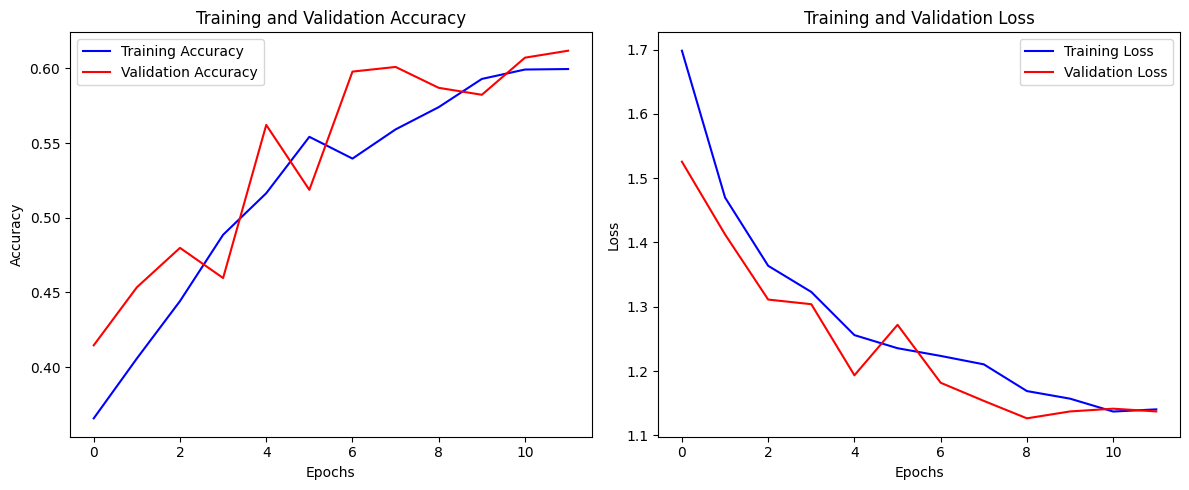

In [83]:
#Step 7 implementation

#CNN_L2 model
from tensorflow.keras.regularizers import l2

cnn_l2 = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(32, (3,3), activation='relu', kernel_regularizer=l2(0.001)),
    Conv2D(32, (3,3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu', kernel_regularizer=l2(0.001)),
    Conv2D(64, (3,3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(5, activation='softmax')
])

cnn_l2.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['acc'])

history_l2 = cnn_l2.fit(train_generator, epochs=15, validation_data=val_generator, callbacks=[early_stop])

plot_training_history(history_l2)


21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 265ms/step


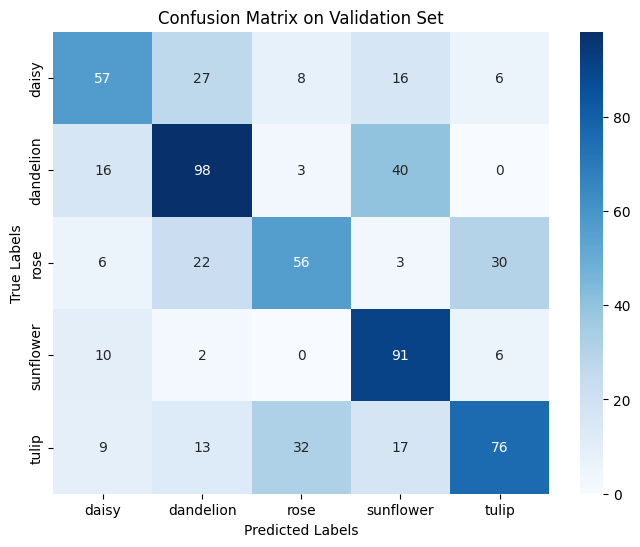

              precision    recall  f1-score   support

       daisy       0.58      0.50      0.54       114
   dandelion       0.60      0.62      0.61       157
        rose       0.57      0.48      0.52       117
   sunflower       0.54      0.83      0.66       109
       tulip       0.64      0.52      0.57       147

    accuracy                           0.59       644
   macro avg       0.59      0.59      0.58       644
weighted avg       0.59      0.59      0.58       644



In [86]:
evaluate_model_on_validation(cnn_l2,val_generator)

Epoch 1/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 165s 2s/step - acc: 0.4537 - loss: 1.7802 - val_acc: 0.2438 - val_loss: 3.0747
Epoch 2/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - acc: 0.5951 - loss: 1.0469 - val_acc: 0.2438 - val_loss: 2.0957
Epoch 3/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - acc: 0.5965 - loss: 1.0064 - val_acc: 0.2873 - val_loss: 1.7517
Epoch 4/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - acc: 0.6226 - loss: 0.9641 - val_acc: 0.3696 - val_loss: 1.6706
Epoch 5/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - acc: 0.6427 - loss: 0.8973 - val_acc: 0.4581 - val_loss: 1.3789
Epoch 6/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 165s 2s/step - acc: 0.6828 - loss: 0.8472 - val_acc: 0.6258 - val_loss: 0.9418
Epoch 7/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - acc: 0.6619 - loss: 0.8513 - val_acc: 0.6522 - val_loss: 0.8596
Epoch 8/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - acc: 0.7053 - loss: 0.7889 - val_acc: 0.4860 - val_loss: 1.6737
Epoch 9/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - acc: 0.6908

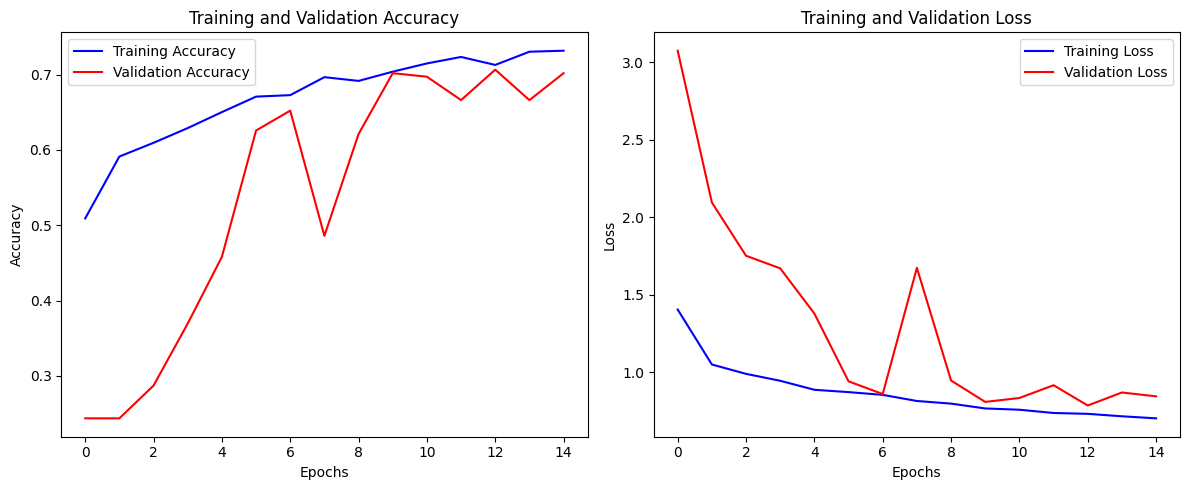

In [87]:
#CNN_BN model
from tensorflow.keras.layers import BatchNormalization

cnn_bn = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(32, (3,3), activation='relu'),
    BatchNormalization(),
    Conv2D(32, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(5, activation='softmax')
])

cnn_bn.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['acc'])

history_bn = cnn_bn.fit(train_generator, epochs=15, validation_data=val_generator, callbacks=[early_stop])

plot_training_history(history_bn)

In [ ]:
evaluate_model_on_validation(cnn_bn,val_generator)

**8. Improve the accuracy by trying something extra. (10 points)** 

* By incorporating additional training strategies such as regularization techniques like dropout, data augmentation, and batch or layer normalization, can the accuracy of the model be improved? 

* Modify the given model architecture to improve the accuracy over the baseline? You can modify the model architecture by adding or removing layers, changing the number of filters, or adding skip connections. 


* Use transfer learning to fine-tune an existing pre-trained model to improve accuracy?  What approach will you use for transfer learning: feature extraction or fine-tuning and why?



In [ ]:
#Step 8 implementation

# Section 2: Transformers

**Objective:** The objective of this section is to implement transformer by given description. Training is NOT required. 

**Tasks:**
To complete this assignment, please submit a single notebook that includes the implementation and outputs of the following steps. Please ensure that the notebook retain the outputs. Failure to do so will result in zero marks for the corresponding steps in which no output is displayed.

**1. Implement the given Transformer architecture (Self-Attention Blocks and FeedForward Networks only). Training is not needed. (20 points)**
*  In Self-Attention Blocks, there are 12 attention heads and 64 head dimension. In FeedForward Networks, the hidden dimensions are 4 times of input dimensions.
*  The input token shape is [batch, num_tokens, dim]
*  Use pre layer normalization in each block
*  Use GeLU activation function in the FeedForward Networks


In [ ]:
#Step 1 implementation

**2. Visualize your architecture. (10 points)**
* Draw the architecture diagram of the Transformer and save as "transformer.png".

> Step 2 Visualization
>
> <img src='transformer.png' alt='student transformer'>